In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import librosa
import librosa.display
from getpass import getpass

**Importing The Dataset**

In [3]:
data , sr = librosa.load('audio/fold1/7061-6-0-0.wav')

C:\Users\yello\AppData\Local\Temp\ipykernel_12964\2123299980.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(data, sr)


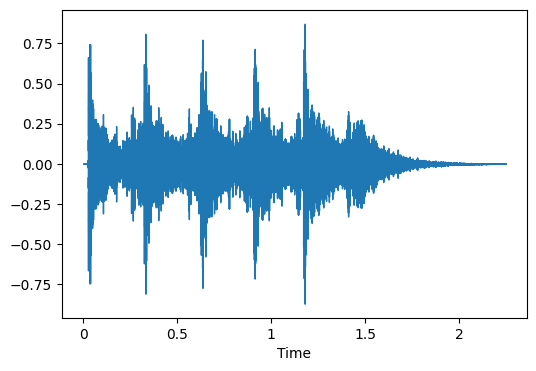

In [4]:
plt.figure(figsize=(6, 4))
librosa.display.waveshow(data, sr)

In [5]:
data = pd.read_csv('metadata/UrbanSound8K.csv')
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [6]:
data.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [7]:
appended = []
for i in range(1,11):
    appended.append(data[data.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold"+str(x) for x in range(1,11)]
class_distribution

,index,jackhammer,dog_bark,children_playing,street_music,air_conditioner,drilling,engine_idling,siren,car_horn,gun_shot
0,fold1,120,100,100,100,100,100,96,86,36,35
1,fold2,120,100,100,100,100,100,100,91,42,35
2,fold3,120,100,100,100,100,100,107,119,43,36
3,fold4,120,100,100,100,100,100,107,166,59,38
4,fold5,120,100,100,100,100,100,107,71,98,40
5,fold6,68,100,100,100,100,100,107,74,28,46
6,fold7,76,100,100,100,100,100,106,77,28,51
7,fold8,78,100,100,100,100,100,88,80,30,30
8,fold9,82,100,100,100,100,100,89,82,32,31
9,fold10,96,100,100,100,100,100,93,83,33,32


In [8]:
data['class'].value_counts(normalize=True)

dog_bark            0.114521
children_playing    0.114521
air_conditioner     0.114521
street_music        0.114521
engine_idling       0.114521
jackhammer          0.114521
drilling            0.114521
siren               0.106390
car_horn            0.049130
gun_shot            0.042831
Name: class, dtype: float64

**Loading The Data Into The Notebook**

In [13]:
iteration_number = 0

def parser(row):
  file_name = 'audio/fold' + str(row.fold) + '/' + row.slice_file_name
  X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
  mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0) 

  feature = mels
  label = row.classID

  global iteration_number
  iteration_number += 1
  if (iteration_number > 0):
    print(f"\rNumber: {iteration_number}/8732 ", end="")  
  return feature, label

In [14]:
transformed_data = data.apply(parser, axis = 1)

Number: 3558/8700 

c:\Users\yello\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)


Number: 8331/8700 

c:\Users\yello\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
c:\Users\yello\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


Number: 8732/8700 

**Preprocessing The Data**

In [15]:
transformed_data = list(transformed_data)
transformed_data.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [16]:
transformed_data = pd.DataFrame(transformed_data, columns = ['feature', 'label'])

In [17]:
X = np.array(transformed_data.feature.tolist())
Y = np.array(transformed_data.label.tolist())

In [18]:
X.shape

(8732, 128)

In [19]:
Y.shape

(8732,)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.1)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7858, 128)
(874, 128)
(7858,)
(874,)


In [22]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test, num_classes = 10)

In [23]:
X_train = X_train.reshape(-1, 16, 8, 1)
X_test = X_test.reshape(-1, 16, 8, 1)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7858, 16, 8, 1)
(874, 16, 8, 1)
(7858, 10)
(874, 10)


**Training The Model**

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM, SimpleRNN, Conv2D, MaxPool2D

In [26]:
model = Sequential([
  Conv2D(128, (2, 2), input_shape=(16, 8, 1), padding='same', activation='tanh'),
  MaxPool2D(pool_size=(2, 2)),
  Conv2D(256, (2, 2), padding='same', activation='tanh'),
  MaxPool2D(pool_size=(2, 2)),
  Dropout(0.2),
  Flatten(),
  Dense(1024, activation='tanh'),
  Dropout(0.1),
  Dense(512, activation='relu'),
  Dropout(0.1),
  Dense(10, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 128)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 128)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 256)         131328    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 256)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 2, 256)         0         
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [28]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [29]:
# Print the lengths of the each dataset
print(f"x_train : {len(X_train)}")
print(f"x_test : {len(X_test)}")
print(f"y_train : {len(Y_train)}")
print(f"y_test : {len(Y_test)}")

x_train : 7858
x_test : 874
y_train : 7858
y_test : 874


In [30]:
hist = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
246/246 [==============================] - 10s 36ms/step - loss: 1.5767 - accuracy: 0.4544 - val_loss: 1.2254 - val_accuracy: 0.5606
Epoch 2/20
246/246 [==============================] - 9s 35ms/step - loss: 1.1747 - accuracy: 0.6041 - val_loss: 0.9697 - val_accuracy: 0.6819
Epoch 3/20
246/246 [==============================] - 9s 35ms/step - loss: 0.9357 - accuracy: 0.6840 - val_loss: 0.8407 - val_accuracy: 0.7471
Epoch 4/20
246/246 [==============================] - 9s 35ms/step - loss: 0.8126 - accuracy: 0.7335 - val_loss: 0.7281 - val_accuracy: 0.7563
Epoch 5/20
246/246 [==============================] - 9s 35ms/step - loss: 0.7222 - accuracy: 0.7538 - val_loss: 0.6973 - val_accuracy: 0.7735
Epoch 6/20
246/246 [==============================] - 9s 35ms/step - loss: 0.6255 - accuracy: 0.7876 - val_loss: 0.6552 - val_accuracy: 0.7918
Epoch 7/20
246/246 [==============================] - 9s 35ms/step - loss: 0.5389 - accuracy: 0.8160 - val_loss: 0.6448 - val_accuracy: 0.806

**Evaluating The Model**

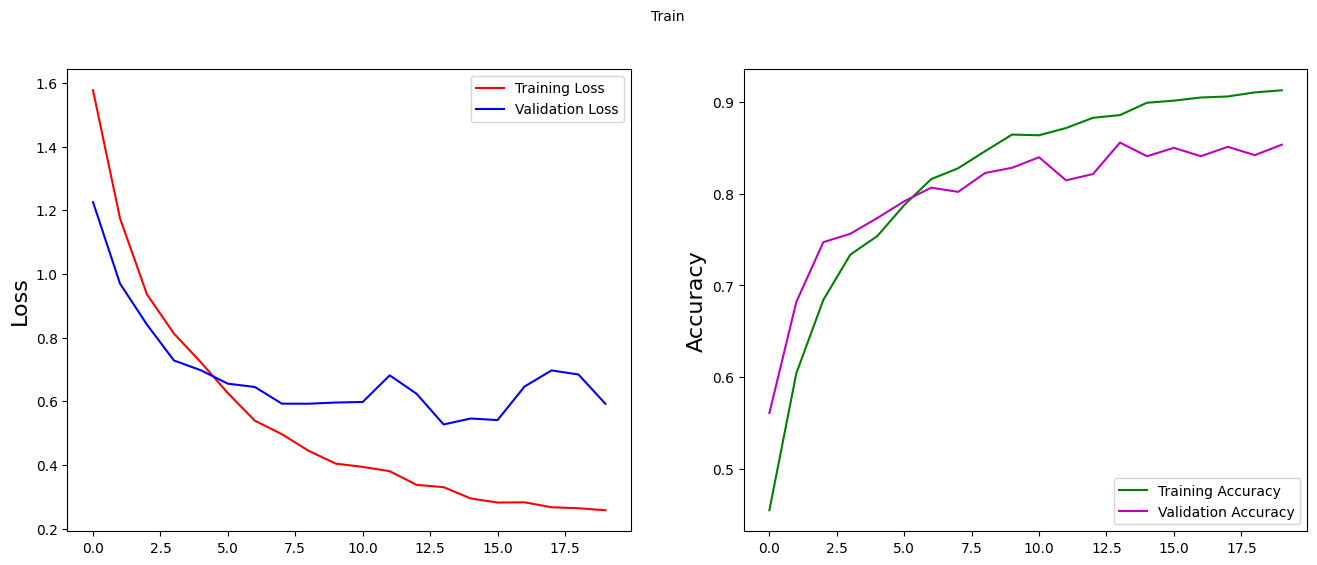

In [31]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.suptitle('Train',fontsize=10)
plt.ylabel('Loss',fontsize=16)
plt.plot(hist.history['loss'],color='r',label='Training Loss')
plt.plot(hist.history['val_loss'],color='b',label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(hist.history['accuracy'],color='g',label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],color='m',label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [32]:
model.evaluate(X_test, Y_test)

28/28 [==============================] - 0s 9ms/step - loss: 0.5920 - accuracy: 0.8535


[0.592003583908081, 0.8535469174385071]

We have achieved 87.35% accuracy on the testing data.